
--- Definiere Modell 3 (Angepasste Architektur) ---


C:\Users\erikm\anaconda3\envs\kipraktikum2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model_3_Adapted_Arch"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,430,699 (5.46 MB)

 Trainable params: 1,430,699 (5.46 MB)

 Non-trainable params: 0 (0.00 B)


--- Kompiliere Modell 3 ---
Epoch 1/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 43s 76ms/step - accuracy: 0.2753 - loss: 2.6155 - val_accuracy: 0.7941 - val_loss: 0.7353
Epoch 2/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 44s 80ms/step - accuracy: 0.8530 - loss: 0.4604 - val_accuracy: 0.8973 - val_loss: 0.3805
Epoch 3/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.9485 - loss: 0.1645 - val_accuracy: 0.9252 - val_loss: 0.3184
Epoch 4/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 43s 79ms/step - accuracy: 0.9725 - loss: 0.0893 - val_accuracy: 0.9322 - val_loss: 0.3516
Epoch 5/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 46s 85ms/step - accuracy: 0.9805 - loss: 0.0644 - val_accuracy: 0.9519 - val_loss: 0.2652
Epoch 6/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 47s 87ms/step - accuracy: 0.9854 - loss: 0.0422 - val_accuracy: 0.9406 - val_loss: 0.2541
Epoch 7/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 45s 82ms/step - accuracy: 0.9874 - loss: 0.0432 - val_accuracy: 0.9524 - val_loss: 0.2064
Epoch 8/20
544/544 ━━━━━━━━━━━━━━━━━━━━ 43s 80ms/step - accur

138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


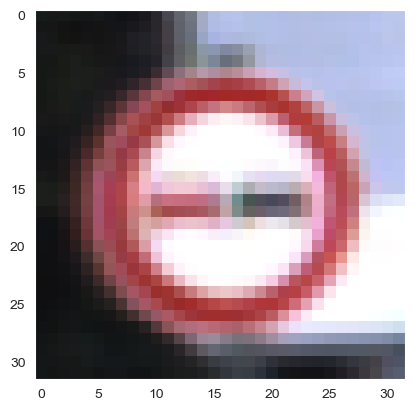

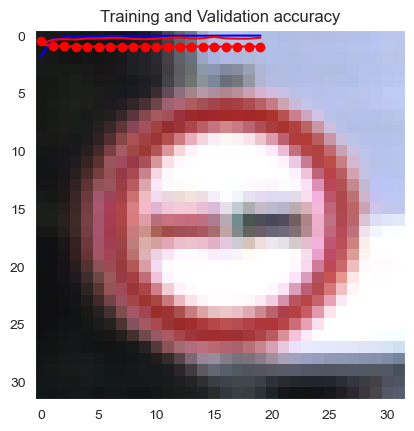

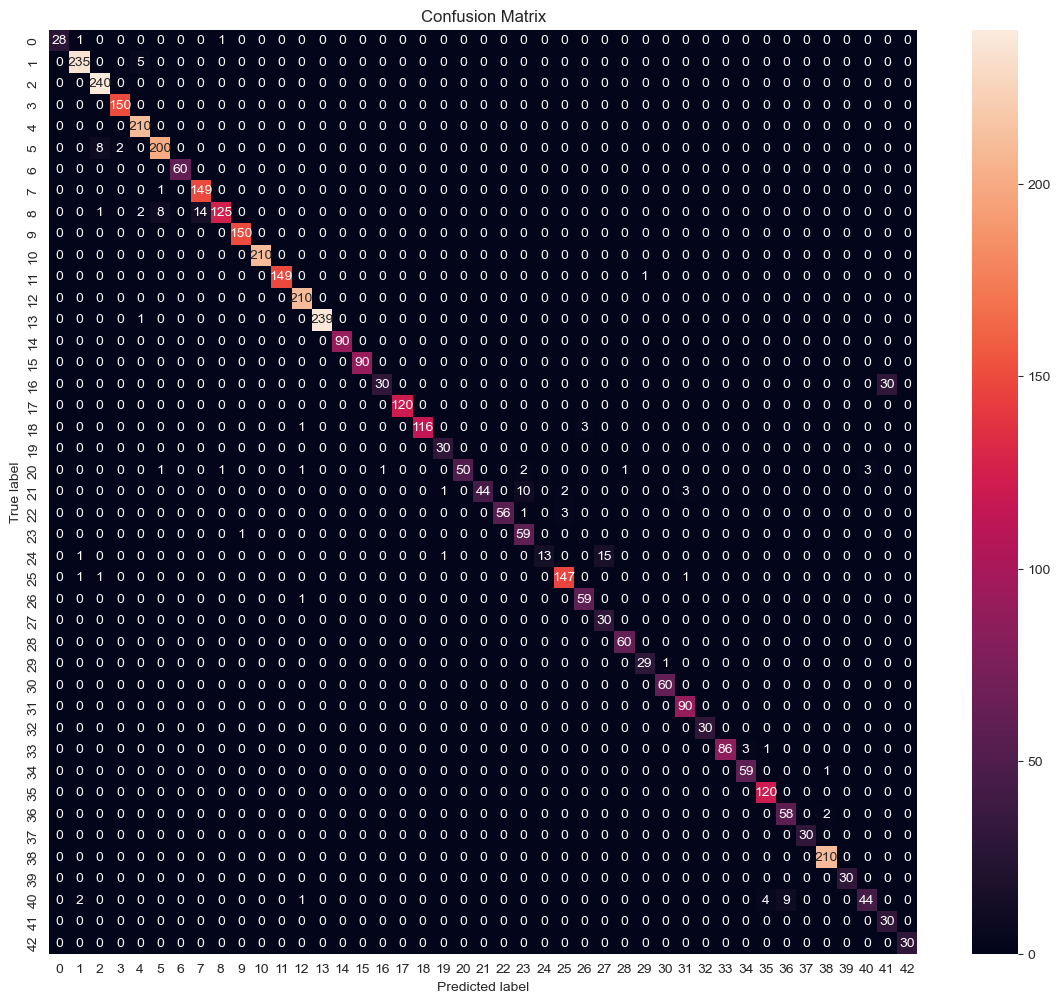

138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9435 - loss: 33.5104
Validation Accuracy: 93.95%


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

with open(os.path.join("dataset", "train.p"), mode='rb') as training_data:
    train = pickle.load(training_data)
with open(os.path.join("dataset", "valid.p"), mode='rb') as validation_data:
    valid = pickle.load(validation_data)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

X_train_norm = X_train / 255
X_valid_norm = X_valid / 255

i = random.randint(1, len(X_train_norm))
plt.grid(False)
plt.imshow(X_train[i])
plt.figure()
plt.grid(False)
plt.imshow(X_train_norm[i].squeeze(), cmap = 'gray') # cmap

from tensorflow.keras import layers, models

model = models.Sequential()

# %% Modell 3 definieren 
print("\n--- Definiere Modell 3 (Angepasste Architektur) ---")
model_3 = models.Sequential(name="Model_3_Adapted_Arch")

# Hier wurde die Filteranzahl geändert (z.B. 64, 128, 256)
model_3.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_3.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_3.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same')) # Noch mehr Filter hier
model_3.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(256, activation='relu')) # Auch die Dense-Schicht wurde vergrößert
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(43, activation='softmax')) # 43 Klassen für Verkehrszeichen


# Prints a summary of your network
model_3.summary()

# %% Modell 3 kompilieren
print("\n--- Kompiliere Modell 3 ---")
model_3.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# %% Modell 3 trainieren
history = model_3.fit(x = X_train_norm,
                    y = y_train,
                    batch_size = 64,
                    epochs = 20, 
                    verbose = 1,
                    validation_data = (X_valid_norm, y_valid))

# %% Trainingsergebnisse visualisieren
history.history.keys()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

# Speichern
model_3.save('saved_model/traffic_sign_model_3.h5')

#Matrix
from sklearn.metrics import confusion_matrix

y_pred_probs = model_3.predict(X_valid_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

test_loss, test_accuracy = model_3.evaluate(X_valid, y_valid, verbose=1)
print(f"Validation Accuracy: {test_accuracy:.2%}")